In [56]:
#Initialization 
using Flux
using Plots
using Pkg
using Interact
using LinearAlgebra
using Missings
using LibPQ
using DataStreams
using DataFrames

In [57]:
include("postgresql.jl")

stream_to_dataframe (generic function with 1 method)

In [58]:
connection_dir = "./postgresql-files/missing-pitch"

username = "user1"
password = "75cd34ab283d2142fde3662d567b15db3f4c706391ac8445796ddeee24fcbcdc"

conn = connect_missing_pitch(connection_dir, username, password)

Connecting to missing-pitch database.
Data are stored in the 'pitchmissing' table.


PostgreSQL connection (CONNECTION_OK) with parameters:
  user = user1
  password = ********************
  dbname = missing-pitch
  host = 141.211.55.211
  port = 58420
  client_encoding = UTF8
  application_name = LibPQ.jl
  sslmode = verify-ca
  sslcompression = 1
  sslcert = ./postgresql-files/missing-pitch/postgresql.crt
  sslkey = ./postgresql-files/missing-pitch/postgresql.key
  sslrootcert = ./postgresql-files/missing-pitch/root.crt
  krbsrvname = postgres
  target_session_attrs = any

In [59]:
#We pick the information of ID 434378 from the pitch miss database as a example because of cannot load full database
query = """
SELECT
    pitchtype,
    venueid,
    islhp,
    islhb,
    inning,
    istop,
    outs,
    balls,
    strikes,
    releaseextension,
    releaseangle,
    releasespinaxis,
    releasepositionx,
    releasepositiony,
    releasepositionz,
    releasespeed,
    releasedirection,
    releasespinrate,
    trajectoryhorizontalbreak,
    trajectoryverticalbreakinduced,
    trajectoryzonespeed,trajectoryzonetime,
    trajectorypolynomialx0,
    trajectorypolynomialx1,
    trajectorypolynomialx2,
    trajectorypolynomialy0,
    trajectorypolynomialy1,
    trajectorypolynomialy2,
    trajectorypolynomialz0,  
    trajectorypolynomialz1,    
    trajectorypolynomialz2, 
    trajectoryverticalapproachangle, 
    trajectoryhorizontalapproachangle,
    trajectoryverticalbreak, 
    trajectorylocationx, 
    trajectorylocationy,
    trajectorylocationz,
    atbatnumber,   
    pitchnumber
FROM pitchmissing
WHERE pitcherid=434378;
"""
datatable = stream_to_dataframe(conn, query)

,pitchtype,venueid,islhp,islhb,inning,istop,outs,balls,strikes,releaseextension,releaseangle,releasespinaxis,releasepositionx,releasepositiony,releasepositionz,releasespeed,releasedirection,releasespinrate,trajectoryhorizontalbreak,trajectoryverticalbreakinduced,trajectoryzonespeed,trajectoryzonetime,trajectorypolynomialx0,trajectorypolynomialx1,trajectorypolynomialx2,trajectorypolynomialy0,trajectorypolynomialy1,trajectorypolynomialy2,trajectorypolynomialz0,trajectorypolynomialz1,trajectorypolynomialz2,trajectoryverticalapproachangle,trajectoryhorizontalapproachangle,trajectoryverticalbreak,trajectorylocationx,trajectorylocationy,trajectorylocationz,atbatnumber,pitchnumber
,String⍰,Int32⍰,String⍰,String⍰,Int32⍰,String⍰,Int32⍰,Int32⍰,Int32⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int32⍰,Int32⍰
1,CU,2394,0,1,4,1,1,2,2,5.03276,1.77456,60.9465,-2.45348,55.4695,6.35982,80.3867,-0.777878,2843.16,-1.30842,-0.73037,73.7008,0.481261,-2.45348,1.59986,5.49352,55.4695,-117.833,11.4656,6.35982,3.65102,-19.5957,-8.08909,-3.68997,-4.45632,-0.411168,1.41667,3.57831,28,5
2,FF,7,0,0,7,0,1,0,0,6.37813,-2.84806,224.465,-2.40628,54.1194,6.53534,93.6637,-4.13406,2497.76,1.43154,1.45605,85.6833,0.402417,-2.40628,9.89107,-9.89627,54.1194,-136.847,14.6144,6.53534,-6.82576,-6.36671,-5.45652,-0.882249,-1.14906,-0.0285443,1.41667,2.75752,61,1
3,FF,2394,0,1,2,1,0,0,0,5.71273,-2.17799,220.093,-2.30289,54.7865,6.57733,93.8798,-4.61242,2557.61,1.17135,1.53981,84.3251,0.41047,-2.29452,10.8153,-8.26433,54.7751,-136.806,16.5971,6.57321,-5.10929,-6.32804,-4.77918,-1.87419,-1.17062,0.752408,1.41667,3.40982,8,1
4,FF,2394,0,0,6,1,1,0,1,6.25728,-1.86189,210.563,-2.27215,54.242,6.39874,96.7838,-2.74533,2556.24,0.808037,1.47383,88.6637,0.389534,-2.26818,6.66521,-6.03729,54.2349,-141.481,15.1139,6.39575,-4.51334,-5.89182,-4.01428,-0.866512,-0.967163,-0.587932,1.41667,3.74365,33,2
5,FF,2394,0,1,1,1,0,2,1,5.99133,-4.14072,207.418,-2.10516,54.511,6.49846,92.8577,-2.43388,2410.32,0.807772,1.55462,85.0606,0.409028,-2.10516,5.76846,-5.44203,54.511,-135.713,14.4421,6.49846,-9.83388,-5.74833,-6.69121,-0.608813,-1.1368,-0.656167,1.41667,1.51441,1,4
6,SL,2394,0,1,6,1,2,0,1,5.45293,-1.88026,155.513,-2.38593,55.0463,6.41543,88.4518,-2.28972,2412.21,-0.304379,0.781557,82.1153,0.431041,-2.3868,5.20669,1.17416,55.0403,-129.376,11.5316,6.41629,-4.28196,-11.4988,-6.76877,-2.98068,-2.20735,0.075645,1.41667,2.43415,50,2
7,CH,2394,0,1,3,1,0,2,0,5.98873,-3.86582,209.355,-2.44757,54.5135,6.46561,91.0516,-3.61296,2486.63,0.8911,1.58175,83.7288,0.416577,-2.44757,8.3962,-5.97069,54.5135,-132.974,13.2362,6.46561,-9.00345,-6.07602,-6.57707,-1.60724,-1.20994,0.0139604,1.41667,1.66056,20,3
8,CU,2394,0,1,7,1,2,0,1,5.23821,1.13684,46.6183,-2.40201,55.2641,6.3695,78.17,-0.855303,2780.69,-0.950248,-0.901734,71.3079,0.494967,-2.40201,1.71107,3.70302,55.2641,-114.614,11.7666,6.3695,2.27468,-20.0012,-9.64651,-2.98924,-4.84293,-0.647872,1.41667,2.59525,52,2
9,FF,missing,0,1,5,0,2,3,2,6.15262,-2.67299,216.663,-2.10431,54.3469,6.59177,94.7739,-3.95209,2669.59,1.00934,1.35352,86.3503,0.400163,-2.10431,9.5699,-7.38203,54.3469,-138.52,15.6148,6.59177,-6.48243,-6.90367,-5.44048,-1.66438,-1.2225,0.543122,1.41667,2.89226,31,7


In [60]:
#we transform pitchtype to number for further operation
data=convert(Array, datatable);

pitchtype_lookup = Dict(
  "CH" => "1",
  "CU" => "2",
  "FC" => "3",
  "FF" => "4",
  "FO" => "5",
  "FS" => "6",
  "FT" => "7",
  "KC" => "8",
  "KN" => "9",
  "SC" => "10",
  "SI" => "11",
  "SL" => "12"
  )
data[:,1] = map(s -> pitchtype_lookup[s], data[:,1]);
#we change string type to float type
data[:,1]=map(x->parse(Float64,x),data[:,1]);
data[:,3]=map(x->parse(Float64,x),data[:,3]);
data[:,4]=map(x->parse(Float64,x),data[:,4]);
data[:,6]=map(x->parse(Float64,x),data[:,6]);


In [61]:
#Algorithm I
#This method is using the iteration of truncated SVD to get the convarge of the matrix to approach the completed matix
#The Codex function is a similiar one which is used in the Lecture of EECS598-003 and get permission to used in this Project
function completeAsvd(A,k,iters)
    error_tol=1e-9;
    MissingEntries = ismissing.(A)
    NotMissingEntries = .!MissingEntries
    error = Inf
    err = []
    idx = 1 # Iteration index
    
    A_hat = collect(Missings.replace(A, 0.0)) # Estimate
    A_hat=convert(Array{Float64,2},A_hat)
    while (error > error_tol && idx <= iters)
        
        A_hat[NotMissingEntries] = A[NotMissingEntries] # Force Known Entries: Projection Step
                
        U, s, V = svd(A_hat)
        A_hat=U[:,1:k]*Diagonal(s[1:k])*V[:,1:k]' 
        
        error = sqrt(sum(abs2, skipmissing(A - A_hat)) / sum(abs2, skipmissing(A))) # Normalized error on known entries
        push!(err,error)
        
        idx = idx + 1
        
    end
 
    return A_hat, err
end


completeAsvd (generic function with 1 method)

In [62]:
#The Algorithm I complete the matrix
method1, err=completeAsvd(data,10,500)


([2.97142 2394.0 … 27.9927 5.0559; 3.52065 6.99958 … 60.9133 0.928948; … ; 2.33147 3312.0 … 15.9146 2.92264; 11.8907 4.99959 … 8.94542 5.19314], Any[0.00128126, 0.00117525, 0.00114252, 0.00111621, 0.00108969, 0.00106475, 0.00104607, 0.0010353, 0.00103013, 0.00102788  …  0.000813385, 0.000813383, 0.000813382, 0.000813381, 0.00081338, 0.000813379, 0.000813377, 0.000813376, 0.000813375, 0.000813374])

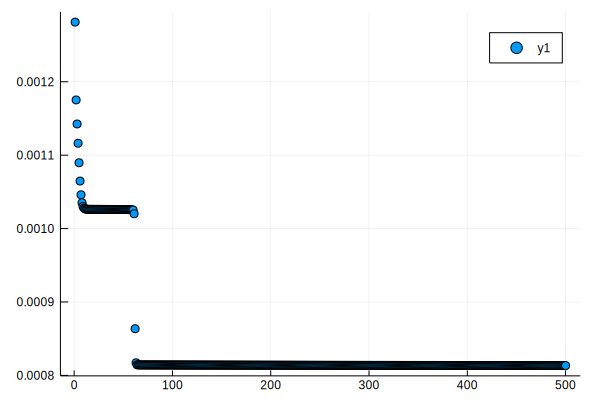

In [63]:
#The Curve of loss function
scatter(err)

In [64]:
#Algorithm II
#The Second Method is using the Optshrink method provided by Pro.Raj as optional homework to complete the matrix
#The codex function is a similiar one which is used in the Homework of EECS598-003 and get permission to used in this Project
function optshrink2(Y, r)
    (U, s, V) = svd(Y)

    (m, n) = size(Y)
    r = minimum([r, m, n]) # ensure r <= min(m,n)

    if m >= n # tall
        # [(n-r)x(n-r); (m-n)x(n-r)] -> [(m-r)x(n-r)]
        S = [diagm(0 => s[(r + 1):n]); zeros(m - n, n - r)]
    else # wide
        # [(m-r)x(m-r), (m-r)x(n-m)] -> [(m-r)x(n-r)]
        S = [diagm(0 => s[(r + 1):m]) zeros(m - r,n - m)]
    end
    Ds=0;
    ws=0;
    w = zeros(r)
    for k=1:r
        (D, Dder) = D_transform_from_matrix(s[k], S)
        w[k] = -2*D/Dder
        Ds=Ds+1/D
        ws=ws+w[k]^2;
    end
   
    Xh = U[:,1:r]*Diagonal(w)*V[:,1:r]'
    MSE=1-ws/Ds
    return Xh,MSE
end

function D_transform_from_matrix(z, X)
    (n, m) = size(X)
    In = Matrix{Int}(I,n,n)
    Im = Matrix{Int}(I,m,m)


    D1 = (1/n)*tr(z*(z^2*In-X*X')^-1)
    D2 = (1/m)*tr(z*(z^2*Im-X'*X)^-1)

    D = D1*D2 # eq (16a) in  paper

    # derivative of D transform
    D1_der = (1/n)*tr(-2*z^2*(z^2*In-X*X')^-2+(z^2*In-X*X')^-1)
    D2_der = (1/m)*tr(-2*z^2*(z^2*Im-X'*X)^-2+(z^2*Im-X'*X)^-1)

    D_der = D1*D2_der + D2*D1_der # eq (16b) in paper

    return (D, D_der)
end

D_transform_from_matrix (generic function with 1 method)

In [71]:
#The Algorithm II complete the matrix
method2= convert(Array{Float64,2},collect(Missings.replace(data_Array, 0.0)));
method2,error2=optshrink2(Data_Completed_2,2)
#The Error of Compeletion
error2

-1.716404796070492e-13

In [66]:
#Algorithm III 
##Algorithm III is the method that use low rank Polar decomposition to approach the completed matrix
function learn2classify_gd(data)
    data_hat = collect(Missings.replace(data, 0.0)) # Estimate
    m,n=size(data_hat)
    A=rand(m,n)
    B=data_hat/A
    error = 0
    err =[]
    err1=zeros(m,n)
    iter=1
    iteration=1000
    mu=1e-3
  while iter <= iteration  
    for i=1:m
        for j=1:n
            summ=0
            for k=1:n 
             summ=summ+A[i,k]*B[k,j]
                end
            if data[i,j]!=missing
                error=data[i,j]-summ
                err1[i,j]=error
            end
            push!(err,error)
        end
    end
    SSE=sum(err.^2)#loss function
    for x=1:m
        for y=1:n
            for z=1:n
                A[x,z]=A[x,z]+mu*err1[x,y]*B[z,y] #learning the loss function
                B[z,y]=B[z,y]+mu*err1[x,y]*A[x,z]
            end
        end
    end
    iter=iter+1
    end
    Completed=A*B
    return Completed,SSE
end

learn2classify_gd (generic function with 1 method)

In [67]:
#The Algorithm III complete the matrix
method3,error3=function learn2classify_gd(data_Array)
error3
# The error

LoadError: syntax: incomplete: "function" at none:2 requires end

3×3 Array{Int64,2}:
 1  0  0
 0  5  0
 0  0  9

2×3 Array{Float64,2}:
 4.0  0.0  0.0
 0.0  7.0  0.0